# Deep Learning

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [5]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

2022-06-13 18:33:26.024440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 10ms/step - loss: 28.5447 - mse: 28.5447 - val_loss: 28.4213 - val_mse: 28.4213
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 25.6299 - mse: 25.6299 - val_loss: 26.5911 - val_mse: 26.5911
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 23.0029 - mse: 23.0029 - val_loss: 24.9230 - val_mse: 24.9230
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 20.6283 - mse: 20.6283 - val_loss: 23.2985 - val_mse: 23.2985
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 18.4817 - mse: 18.4817 - val_loss: 21.6801 - val_mse: 21.6801
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 16.5383 - mse: 16.5383 - val_loss: 20.0492 - val_mse: 20.0492
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 14.7554 - mse: 14.7554 - val_loss: 18.2160 - val_mse: 18.2160
Epoch 8/200
35/35 [==============================] - 0

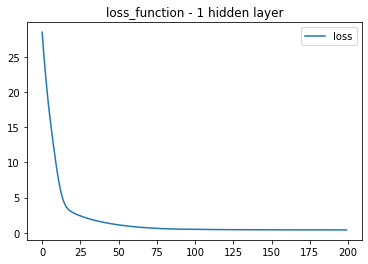

In [7]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [8]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 12ms/step - loss: 26.3891 - mse: 26.3891 - val_loss: 22.2534 - val_mse: 22.2534
Epoch 2/200
35/35 [==============================] - 0s 5ms/step - loss: 23.0210 - mse: 23.0210 - val_loss: 18.2834 - val_mse: 18.2834
Epoch 3/200
35/35 [==============================] - 0s 9ms/step - loss: 19.2222 - mse: 19.2222 - val_loss: 14.2989 - val_mse: 14.2989
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 15.2271 - mse: 15.2271 - val_loss: 10.6956 - val_mse: 10.6956
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 11.4168 - mse: 11.4168 - val_loss: 7.9523 - val_mse: 7.9523
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 8.2541 - mse: 8.2541 - val_loss: 6.2223 - val_mse: 6.2223
Epoch 7/200
35/35 [==============================] - 0s 5ms/step - loss: 5.9952 - mse: 5.9952 - val_loss: 5.1840 - val_mse: 5.1840
Epoch 8/200
35/35 [==============================] - 0s 9ms/step

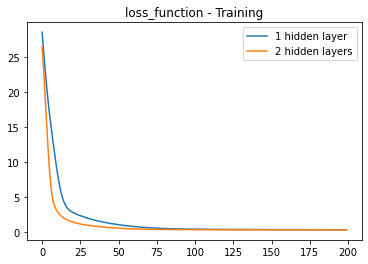

In [10]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

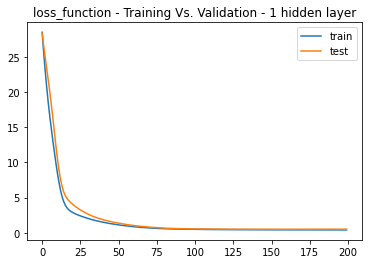

In [11]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

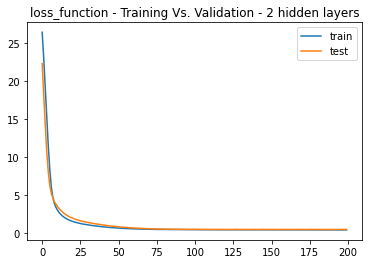

In [12]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()